# Najbolj priljubljene nenavadne destinacije po svetu

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

%matplotlib inline

priljubljene = pd.read_csv('obdelani-podatki/priljubljene_destinacije.csv', index_col='id')
lokacije = pd.read_csv('obdelani-podatki/lokacije.csv', index_col='lokacija')
glasovi = pd.read_csv('obdelani-podatki/glasovi.csv', index_col='id')
obiskane = pd.read_csv('obdelani-podatki/obiskane_destinacije.csv', index_col='id')

V tej projektni nalogi bomo analizirali 10.000 najbolj priljubjenih nenavadnih destinacij na svetu, kot so objavljene na spletni strani Atlas Obscura. 

Za vsako izmed teh destinacij sem v eni tabeli zbrala ime destinacije, njeno lokacijo, zemljepisno širino in dolžino, kratek opis, povezavo do spletne strani ter uvrstitev na lestvici priljubljenosti. V posebni tabeli sem nato za vsako izmed teh 10.000 destinacij razčlenila njeno lokacijo na mesto in državo, kar je olajšalo nadaljno analizo, v še eni tabeli pa sem zbrala števila obiskovalcev spletne strani Atlas Obscura, ki so posamezno destinacijo bodisi že obiskali bodisi si jo obiskati še želijo. Nato sem si ogledala še 10.000 najbolj obiskanih destinacij z namenom primerjave seznamov priljubljenosti in obiskanosti v nadaljevanju.

## Razvrstitev po priljubljenosti

Oglejmo si najprej podrobneje tabelo, ki vsebuje najbolj priljubljene destinacije.

In [141]:
priljubljene

destinacija                      lokacija  \
id                                                                        
1212                    City Hall Station            New York, New York   
1230                    Highgate Cemetery               London, England   
252                        The Wave Organ     San Francisco, California   
4334   Underground Tunnels of Los Angeles       Los Angeles, California   
404                   Catacombes de Paris                 Paris, France   
...                                   ...                           ...   
24951                    Expo '92 Grounds                Seville, Spain   
24568                      Wild Bird Fund            New York, New York   
19852              Sheldon Peck Homestead             Lombard, Illinois   
24047                        Soviet Dacha                Moscow, Russia   
23071                    Sam Maloof House  Rancho Cucamonga, California   

        sirina   dolzina                                               opis  \
id                                                                            
1212   40.7134  -74.0046  A beautiful and abandoned New York subway stat...   
1230   51.5675   -0.1483  London's creepiest cemetery was once the site ...   
252    37.8085 -122.4401     A huge musical instrument played by the ocean.   
4334   34.0558 -118.2447  During prohibition, corrupt city officials ran...   
404    48.8343    2.3322  The Catacombs hold secrets much stranger than ...   
...        ...       ...                                                ...   
24951  37.4060   -6.0071  An eerie collection of the surviving structure...   
24568  40.7873  -73.9713  New York City's only wildlife rehabilitation c...   
19852  41.8891  -88.0092  People escaping slavery passed through the old...   
24047  55.5226   37.4916  This frozen-in-time summer home outside Moscow...   
23071  34.1613 -117.6158  A living museum dedicated to the legendary woo...   

                                                     url  priljubljenost  
id                                                                        
1212   https://www.atlasobscura.com/places/city-hall-...               1  
1230   https://www.atlasobscura.com/places/highgate-c...               2  
252       https://www.atlasobscura.com/places/wave-organ               3  
4334   https://www.atlasobscura.com/places/undergroun...               4  
404    https://www.atlasobscura.com/places/catacombes...               5  
...                                                  ...             ...  
24951  https://www.atlasobscura.com/places/expo-92-gr...           10004  
24568  https://www.atlasobscura.com/places/wild-bird-...           10005  
19852  https://www.atlasobscura.com/places/peck-homes...           10006  
24047   https://www.atlasobscura.com/places/soviet-dacha           10007  
23071  https://www.atlasobscura.com/places/sam-maloof...           10008  

[10008 rows x 7 columns]

### Lokacije najbolj priljubljenih destinacij

Najprej nas je zanimalo, na katerih lokacijah se nahaja največ nenavadnih priljubljenih destinacij. Na spodnjem grafu lahko vidimo, da so najbolj skoncentirane v New Yorku, tam jih je kar 279. Sledi London z 260 destinacijami, potem pa lahko opazimo, da izmed prvih desetih sedem mest zasedajo lokacije v ZDA. To je po vsej verjetnosti posledica pretežno ameriškega obiska spletne strani, ki iz ZDA tudi izvira.

Text(0.5, 1.0, 'Lokacije najbolj priljubljenih destinacij')

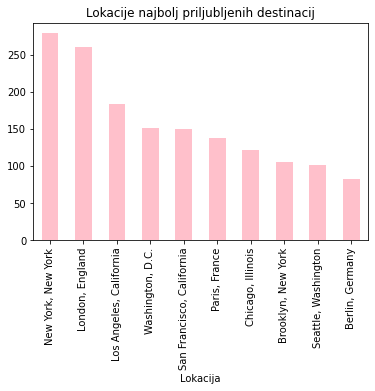

In [135]:
po_lokacijah = priljubljene.groupby('lokacija').size()

prvih_deset_loc = po_lokacijah.sort_values(ascending=False).head(10)

prvih_deset_loc.plot.bar(xlabel = 'Lokacija', color='pink').set_title('Lokacije najbolj priljubljenih destinacij')

Obenem so mesta kot na primer New York, London, Los Angeles in Pariz, če jih naštejemo le nekaj, zelo velika, kar pomeni, da se tam lahko skriva veliko več obskurnih destinacij kot v manjših mestecih - če si spodaj ogledamo še nekaj mest, kjer se nahaja le ena izmed prvih 10.000 najbolj priljubljenih nenavadnih destinacij, opazimo, da gre res za veliko manj znane in občutno manjše kraje.

In [32]:
po_lokacijah.sort_values(ascending=False).tail()

lokacija
Hinckley, Ohio             1
Hinckley, Utah             1
Hinsdale, New Hampshire    1
Hinterbrühl, Austria       1
Șinca, Romania             1
dtype: int64

Poleg samih imen lokacij priljubljenih destinacij pa so v naši tabeli shranjene tudi njihove geografske koordinate - oglejmo si podrobneje še slednje. 

Text(0.5, 1.0, 'Koordinate najbolj priljubljenih destinacij')

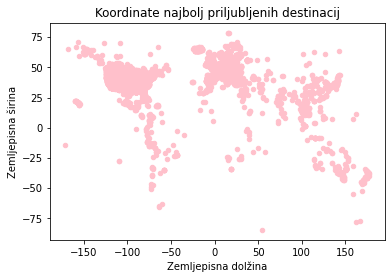

In [33]:
priljubljene.plot.scatter(x='dolzina', y='sirina', color='pink', xlabel='Zemljepisna dolžina', ylabel='Zemljepisna širina').set_title("Koordinate najbolj priljubljenih destinacij")

Na zgornjem grafu lahko vidimo...

### Države najbolj priljubljenih destinacij

Če smo si v prejšnjem razdelku ogledali, na katerih lokacijah (tj. mestih in zemljepisnih koordinatah) se nahaja največ priljubljenih destinacij, nas sedaj zanima še, katere države se pojavijo med prvimi 10.000 najbolj priljubljenimi destinacijami - in koliko različnih mest iz posameznih držav je na tem seznamu izpostavljenih. S tem namenom si oglejmo posebno tabelo, kjer je vsaka unikatna lokacija razdeljena na mesto in državo.

In [34]:
lokacije

lokacija             mesto  \
0        's-Hertogenbosch, Netherlands  's-Hertogenbosch   
1                      A Coruña, Spain          A Coruña   
2                      Aarhus, Denmark            Aarhus   
3                           Aba, China               Aba   
4                     Abang, Indonesia             Abang   
...                                ...               ...   
5227             Yogyakarta, Indonesia        Yogyakarta   
5228                Zanzibar, Tanzania          Zanzibar   
5229           Zavikon Island, Ontario    Zavikon Island   
5230  Čapljina, Bosnia and Herzegovina          Čapljina   
5231            Český Krumlov, Czechia     Český Krumlov   

                      drzava  
0                Netherlands  
1                      Spain  
2                    Denmark  
3                      China  
4                  Indonesia  
...                      ...  
5227               Indonesia  
5228                Tanzania  
5229                  Canada  
5230  Bosnia and Herzegovina  
5231                 Czechia  

[5232 rows x 3 columns]

Text(0.5, 1.0, 'Države najbolj priljubljenih destinacij')

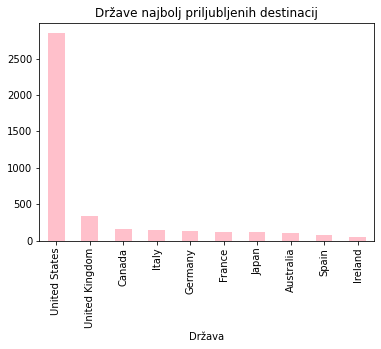

In [134]:
po_drzavah = lokacije.groupby('drzava').size()

prvih_deset = po_drzavah.sort_values(ascending=False).head(10)

prvih_deset.plot.bar(xlabel = 'Država', color='pink').set_title('Države najbolj priljubljenih destinacij')

Tudi brez upoštevanja ponovitev posameznih lokacij je na podlagi zgornje tabele in grafičnega prikaza jasno, da je daleč največ izpostavljenih lokacij iz ZDA, in sicer kar dobra četrtina, sledita pa ji prav tako angleško govoreče Združeno kraljestvo in Kanada. Vzrok za to lahko zopet najdemo v dejstvu, da gre za ameriško spletno stran, katere obiskovalci skoraj gotovo govorijo angleško.

### Razvrstitev po obiskanosti

Poleg najbolj priljubljenih smo zbrali tudi podatke za 10.000 najbolj *obiskanih* destinacij.

In [36]:
obiskane

id                 destinacija                   lokacija   sirina  \
0       2997             Alcatraz Island  San Francisco, California  37.8267   
1        642               The High Line         New York, New York  40.7392   
2       8651             Sagrada Família           Barcelona, Spain  41.4036   
3        139  Prague Astronomical Clock             Prague, Czechia  50.0870   
4       5074                Faneuil Hall      Boston, Massachusetts  42.3600   
...      ...                         ...                        ...      ...   
10003  16029     Clara Glen Pet Cemetery        Linwood, New Jersey  39.3319   
10004  15575        Gennett Walk of Fame          Richmond, Indiana  39.8267   
10005  12525   Statue of Michael Jackson        Manchester, England  53.4859   
10006  15231         Bungle Bungle Range       Purnululu, Australia -17.5298   
10007  15153            Kastrup Sea Bath           Kastrup, Denmark  55.6453   

        dolzina                                               opis  \
0     -122.4230  In all of the 29 years it was in operation, no...   
1      -74.0083  Elevated freight railway turned wildly success...   
2        2.1744  Construction of Barcelona's iconic (but contro...   
3       14.4208  Macabre astrological automaton clock dating to...   
4      -71.0562  A former waterfront market is now in the cente...   
...         ...                                                ...   
10003  -74.5829  This quaint New Jersey graveyard is an eternal...   
10004  -84.9000  This Indiana walk of fame honors music legends...   
10005   -2.2422  Fulham F.C. imploded once everyone excised its...   
10006  128.4008  These Australian rock formations look like Mar...   
10007   12.6494  This ultra-modern wooden boardwalk turns the o...   

                                                     url  obiskanost  
0      https://www.atlasobscura.com/places/alcatraz-i...           1  
1           https://www.atlasobscura.com/places/highline           2  
2      https://www.atlasobscura.com/places/sagrada-fa...           3  
3      https://www.atlasobscura.com/places/prague-ast...           4  
4       https://www.atlasobscura.com/places/faneuil-hall           5  
...                                                  ...         ...  
10003  https://www.atlasobscura.com/places/clara-glen...       10004  
10004  https://www.atlasobscura.com/places/gennett-wa...       10005  
10005  https://www.atlasobscura.com/places/statue-of-...       10006  
10006  https://www.atlasobscura.com/places/bungle-bun...       10007  
10007  https://www.atlasobscura.com/places/kastrup-se...       10008  

[10008 rows x 8 columns]

Če si ogledamo, kje približno se nahajajo slednje, lahko vidimo, da je njihova razporeditev po svetu izrazito podobna razporeditvi najbolj priljubljenih destinacij.

Text(0.5, 1.0, 'Koordinate najbolj obiskanih destinacij')

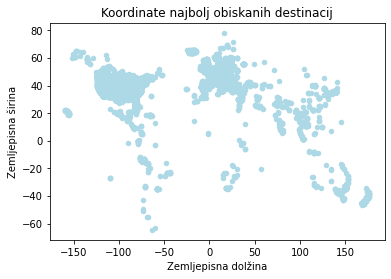

In [37]:
obiskane.plot.scatter(x='dolzina', y='sirina', color='lightblue', xlabel='Zemljepisna dolžina', ylabel='Zemljepisna širina').set_title("Koordinate najbolj obiskanih destinacij")

Vendar pa kljub temu ne gre za povsem enake destinacije.

In [104]:
podtabela_priljubljene = priljubljene[['destinacija', 'priljubljenost']]
podtabela_obiskane = obiskane[['obiskanost']]

priljubljenost_in_obiskanost = pd.merge(pd.merge(podtabela_priljubljene, podtabela_obiskane, on='id', how='left'), glasovi, on='id')

priljubljenost_in_obiskanost.tail(10)

destinacija  priljubljenost  obiskanost  obiskali  \
id                                                                        
32259              Luna de Xelajú            9999         NaN        39   
31482  The Labirinto della Masone           10000         NaN        31   
29538     Rocky Valley Labyrinths           10001         NaN        39   
27183  Ehrenberg Pioneer Cemetery           10002         NaN        49   
23255  John Wesley Hardin's Grave           10003      9981.0        83   
24951            Expo '92 Grounds           10004      6598.0       137   
24568              Wild Bird Fund           10005      9259.0        89   
19852      Sheldon Peck Homestead           10006         NaN        76   
24047                Soviet Dacha           10007         NaN        51   
23071            Sam Maloof House           10008         NaN        50   

       zelijo  
id             
32259     233  
31482     234  
29538     233  
27183     233  
23255     235  
24951     236  
24568     234  
19852     234  
24047     233  
23071     233

In [97]:
priljubljenost_in_obiskanost[priljubljenost_in_obiskanost.obiskanost.isna()].shape[0]

2441

Če vsem destinacijam, ki se nahajajo na seznamu 10.000 najbolj priljubljenih, pridružimo uvrstitev na lestvici obiskanosti in tabelo z glasovi, opazimo, da 2441 izmed najbolj priljubljenih ni med 
10.000 najbolj obiskanimi - oglejmo si, kakšna je splošna medsebojna odvisnost med uvrstitvami na omenjenih seznamih (tukaj bomo opazovali le tiste destinacije, ki se pojavljajo na obeh seznamih, torej izvzemši omenjenih 2441).

In [125]:
priljubljenost_z_obiskanostjo = pd.merge(pd.merge(podtabela_priljubljene, podtabela_obiskane, on='id'), glasovi, on='id')

priljubljenost_z_obiskanostjo['razlike'] = priljubljenost_z_obiskanostjo.zelijo - priljubljenost_z_obiskanostjo.obiskali

priljubljenost_z_obiskanostjo[priljubljenost_z_obiskanostjo.razlike > 0] # 6486
priljubljenost_z_obiskanostjo[priljubljenost_z_obiskanostjo.razlike < 0] # 1077
priljubljenost_z_obiskanostjo[priljubljenost_z_obiskanostjo.razlike == 0] # 4

priljubljenost_z_obiskanostjo['razmerja'] = priljubljenost_z_obiskanostjo.zelijo / priljubljenost_z_obiskanostjo.obiskali # (obiskali) : (zelijo)

priljubljenost_z_obiskanostjo.head(10)

destinacija  priljubljenost  obiskanost  \
id                                                                      
1212                    City Hall Station               1         221   
1230                    Highgate Cemetery               2          90   
252                        The Wave Organ               3         112   
4334   Underground Tunnels of Los Angeles               4        1094   
404                   Catacombes de Paris               5          13   
17458                   Leadenhall Market               6          60   
166                   The Evolution Store               7         137   
19170      Magowan's Infinite Mirror Maze               8         887   
4335               Secret Tiled Staircase               9         166   
1173                          Dream House              10        1158   

       obiskali  zelijo  razlike  razmerja  
id                                          
1212       1465    7149     5684  4.879863  
1230       2129    6691     4562  3.142790  
252        2011    6393     4382  3.179015  
4334        607    6046     5439  9.960461  
404        3659    5858     2199  1.600984  
17458      2479    5786     3307  2.334006  
166        1823    5767     3944  3.163467  
19170       694    5468     4774  7.878963  
4335       1668    5439     3771  3.260791  
1173        589    5135     4546  8.718166

<AxesSubplot:xlabel='Priljubljenost', ylabel='Razlike'>

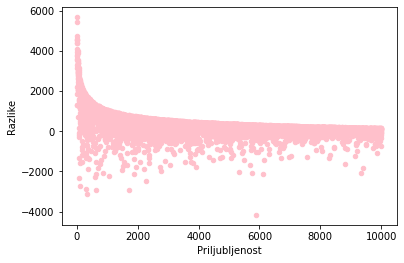

In [149]:
priljubljenost_z_obiskanostjo.plot.scatter(x='priljubljenost', y='razlike', color='pink', xlabel='Priljubljenost', ylabel='Razlike')

In [150]:
priljubljenost_z_obiskanostjo.plot.scatter(x='priljubljenost', y='razmerja', color='pink', xlabel='Priljubljenost', ylabel='Razmerja')

<AxesSubplot:xlabel='Priljubljenost', ylabel='Razmerja'>

### Tipi najbolj priljubjenih destinacij

Na koncu nas zanima še, ali obstaja kakšen tip destinacije, ki je še posebej priljubljen (npr. muzeji, pokopališča, ruševine...) in se na seznamu pojavlja občutno pogosteje od ostalih. S tem namenom bomo pod drobnogled vzeli imena priljubljenih destinacij ter njihove kratke opise.

In [144]:
tipi = priljubljene[['destinacija', 'opis', 'priljubljenost']]

tipi

destinacija  \
id                                          
1212                    City Hall Station   
1230                    Highgate Cemetery   
252                        The Wave Organ   
4334   Underground Tunnels of Los Angeles   
404                   Catacombes de Paris   
...                                   ...   
24951                    Expo '92 Grounds   
24568                      Wild Bird Fund   
19852              Sheldon Peck Homestead   
24047                        Soviet Dacha   
23071                    Sam Maloof House   

                                                    opis  priljubljenost  
id                                                                        
1212   A beautiful and abandoned New York subway stat...               1  
1230   London's creepiest cemetery was once the site ...               2  
252       A huge musical instrument played by the ocean.               3  
4334   During prohibition, corrupt city officials ran...               4  
404    The Catacombs hold secrets much stranger than ...               5  
...                                                  ...             ...  
24951  An eerie collection of the surviving structure...           10004  
24568  New York City's only wildlife rehabilitation c...           10005  
19852  People escaping slavery passed through the old...           10006  
24047  This frozen-in-time summer home outside Moscow...           10007  
23071  A living museum dedicated to the legendary woo...           10008  

[10008 rows x 3 columns]

Do posameznih tipov najlažje pridemo, če najprej v imenih, potem pa še v opisih destinacij poiščemo besede, ki se največkrat ponavljajo. Ker je naš cilj poiskati najpogostejše samostalnike in pridevnike, bomo spustili besede s tremi črkami ali manj izpustili (v izogib ponavljajočim besedam kot so "a", "the", "and", "is", "was"...).

In [218]:
def loci_besede(niz):
    return pd.Series(
        sorted(
            {beseda for beseda in niz.replace(',', '').replace('.', '').replace('"', '').lower().split() if len(beseda) > 3}
            ))

besede_v_imenih = tipi.destinacija.apply(loci_besede)
besede_v_opisih = tipi.opis.apply(loci_besede)

/var/folders/h7/n4phsqmd0c33sh93vrzrkqzh0000gn/T/ipykernel_65873/750909864.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(


In [253]:
imena = pd.melt(besede_v_imenih).dropna()
imena = imena.drop(columns='variable')
po_imenih = imena.groupby('value').size().sort_values(ascending=False).head(20)
po_imenih

value
museum      822
house       329
park        303
cemetery    159
castle      149
           ... 
center       92
city         92
monument     90
cave         85
grave        85
Length: 20, dtype: int64

Text(0.5, 1.0, 'Število ponovitev najpogostejših besed v imenih destinacij')

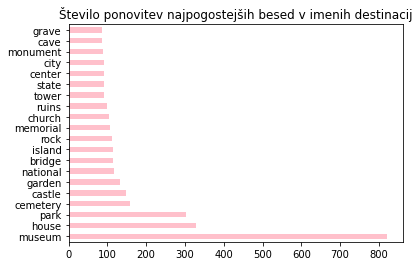

In [273]:
po_imenih.plot.barh(xlabel = '', color='pink').set_title('Število ponovitev najpogostejših besed v imenih destinacij')

In [265]:
opisi = pd.melt(besede_v_opisih).dropna()
opisi = opisi.drop(columns='variable')
opisi = opisi[(opisi.value != 'this') & (opisi.value != 'with') & (opisi.value != 'that') & (opisi.value != 'from') & (opisi.value != 'where')]
po_opisih = opisi.groupby('value').size().sort_values(ascending=False).head(20)
po_opisih

value
museum       552
home         433
largest      407
abandoned    396
once         391
            ... 
been         282
only         280
over         276
oldest       270
city         260
Length: 20, dtype: int64

Text(0.5, 1.0, 'Število ponovitev najpogostejših besed v opisih destinacij')

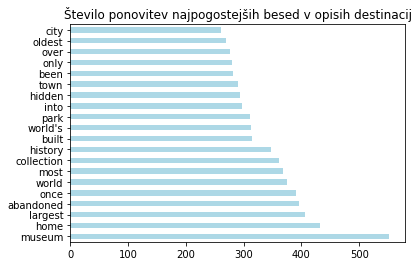

In [274]:
po_opisih.plot.barh(xlabel = '', color='lightblue').set_title('Število ponovitev najpogostejših besed v opisih destinacij')

Text(0.5, 1.0, 'Število ponovitev najpogostejših besed v imenih in opisih destinacij')

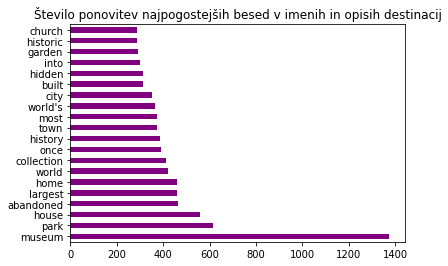

In [282]:
skupaj = pd.concat([imena, opisi])

po_besedah = skupaj.groupby('value').size().sort_values(ascending=False).head(20)

po_besedah.plot.barh(xlabel = '', color='purple').set_title('Število ponovitev najpogostejših besed v imenih in opisih destinacij')